the main figure of the paper.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
from tang_jcompneuro.model_fitting_postprocess import load_data_generic

In [3]:
cnn_mapping_dict = {
    'b.9': 'R_max',
    'b.2': 'R_max_Q',
    'b.5': 'R_max_HALF',
    'b.9_avg': 'R_avg',
    'b.9_sq': 'S_max',
    'b.9_avg_sq': 'S_avg',
    'b.9_halfsq': 'HS_max',
    'b.9_avg_halfsq': 'HS_avg',
    'b.9_abs': 'A_max',
    'b.9_avg_abs': 'A_avg',
    'b.9_linear': 'L_max',
    'b.9_avg_linear': 'L_avg',
    'b.9_threshold': 'T',
    'b.9_nonthreshold': 'NT',
    'b.9_avgpool': 'AVG',
    'b.9_maxpool': 'MAX',
}


def modelname_alternative(model_type, model_subtype, _1, _2):
    if model_type == 'cnn':
        assert not _2
        if _1:
            suffix = cnn_mapping_dict[model_subtype] + '_ALL'
        else:
            suffix = cnn_mapping_dict[model_subtype]
    elif model_type == 'glm':
        suffix = model_subtype
    else:
        raise NotImplementedError
    # dollar is later used to find those relevant models.
    return f'{model_type}${suffix}'
    # well, I guess I don't need to be that fancy.
    # just manually doing it should be fine.
    # also more flexible, as I can control order more freely.
#     reutr
    


def check_all(squared, score_col_name):
    models_to_examine = [
        ('cnn', 'b.9'),
        ('cnn', 'b.9', True),
        # as # of parameter control.
        ('cnn', 'b.5'),
        ('cnn', 'b.2'),
        
        ('cnn', 'b.9_avg', True),
        ('cnn', 'b.9_abs', True),
        ('cnn', 'b.9_avg_abs', True),
        ('cnn', 'b.9_linear', True),
        ('cnn', 'b.9_avg_linear', True),
        ('cnn', 'b.9_sq', True),
        ('cnn', 'b.9_avg_sq', True),
        ('cnn', 'b.9_halfsq', True),
        ('cnn', 'b.9_avg_halfsq', True),
        
        ('cnn', 'b.9_avg'),
        ('cnn', 'b.9_abs'),
        ('cnn', 'b.9_avg_abs'),
        ('cnn', 'b.9_linear'),
        ('cnn', 'b.9_avg_linear'),
        ('cnn', 'b.9_sq'),
        ('cnn', 'b.9_avg_sq'),
        ('cnn', 'b.9_halfsq'),
        ('cnn', 'b.9_avg_halfsq'),
        
        ('cnn', 'b.9_threshold', True, False, ('b.9', 'b.9_halfsq', 'b.9_avg', 'b.9_avg_halfsq')),
        ('cnn', 'b.9_nonthreshold', True, False, ('b.9_abs', 'b.9_sq', 'b.9_avg_abs', 'b.9_avg_sq')),
        
        ('cnn', 'b.9_avgpool', True, False, (
                                         'b.9_avg_abs', 'b.9_avg_sq', 'b.9_avg', 'b.9_avg_halfsq')),
        ('cnn', 'b.9_maxpool', True, False, ('b.9_abs', 'b.9_sq','b.9', 'b.9_halfsq',)),
        
        ('glm', 'glm_all', True, False, ('fpower_poisson', 'linear_poisson', 'gqm.2_poisson', 'gqm.4_poisson', 'gqm.8_poisson')),
        ('glm', 'glm_all_overfit', True, True, ('fpower_poisson', 'linear_poisson', 'gqm.2_poisson', 'gqm.4_poisson', 'gqm.8_poisson')),
    ]
    
    
    return load_data_generic(models_to_examine, load_naive=False, metric='ccnorm_5', squared=squared,
                            score_col_name=score_col_name, modelname_alternative=modelname_alternative,
#                             datasets_to_check=('MkA_Shape',)
                            )


In [4]:
df_all_cc2 = check_all(squared=True, score_col_name='cc2').xs(100, level='percentage').sort_index()

MkA_Shape all
MkA_Shape OT
MkE2_Shape all
MkE2_Shape OT


In [5]:
df_all_cc2

cc2
dataset    subset model                                                                 
MkA_Shape  OT     cnn$AVG_ALL          {'OT': {'raw': [0.559909091849, 0.696135249034...
                  cnn$A_avg            {'OT': {'raw': [0.577429506312, 0.589485895382...
                  cnn$A_avg_ALL        {'OT': {'raw': [0.572412085755, 0.576449138445...
                  cnn$A_max            {'OT': {'raw': [0.487909570828, 0.530403722479...
                  cnn$A_max_ALL        {'OT': {'raw': [0.465893964311, 0.539562648706...
                  cnn$HS_avg           {'OT': {'raw': [0.623464881184, 0.689178209422...
                  cnn$HS_avg_ALL       {'OT': {'raw': [0.623464881184, 0.684961706486...
                  cnn$HS_max           {'OT': {'raw': [0.477342130633, 0.480689886562...
                  cnn$HS_max_ALL       {'OT': {'raw': [0.477342130633, 0.586526952902...
                  cnn$L_avg            {'OT': {'raw': [0.170789471451, 0.079667931744...
                  cnn$L_avg_ALL        {'OT': {'raw': [0.160852909459, 0.074500429224...
                  cnn$L_max            {'OT': {'raw': [0.45915600882, 0.528881337833,...
                  cnn$L_max_ALL        {'OT': {'raw': [0.434607722546, 0.479139908303...
                  cnn$MAX_ALL          {'OT': {'raw': [0.477342130633, 0.56620089587,...
                  cnn$NT_ALL           {'OT': {'raw': [0.633303968731, 0.589485895382...
                  cnn$R_avg            {'OT': {'raw': [0.546390109851, 0.664418314007...
                  cnn$R_avg_ALL        {'OT': {'raw': [0.546390109851, 0.67219393368,...
                  cnn$R_max            {'OT': {'raw': [0.414059804323, 0.59491178022,...
                  cnn$R_max_ALL        {'OT': {'raw': [0.433277470473, 0.62341756481,...
                  cnn$R_max_HALF       {'OT': {'raw': [0.416476547924, 0.61190805909,...
                  cnn$R_max_Q          {'OT': {'raw': [0.456272474485, 0.433296536107...
                  cnn$S_avg            {'OT': {'raw': [0.62866351781, 0.314199090106,...
                  cnn$S_avg_ALL        {'OT': {'raw': [0.605113455057, 0.319367875547...
                  cnn$S_max            {'OT': {'raw': [0.532528110838, 0.425141246621...
                  cnn$S_max_ALL        {'OT': {'raw': [0.566898295013, 0.477031909712...
                  cnn$T_ALL            {'OT': {'raw': [0.559909091849, 0.653517449935...
                  glm$glm_all          {'OT': {'raw': [0.342331105248, 0.170731213797...
                  glm$glm_all_overfit  {'OT': {'raw': [0.342331105248, 0.229722149219...
           all    cnn$AVG_ALL          {'OT': {'raw': [0.514111977198, 0.744804274057...
                  cnn$A_avg            {'OT': {'raw': [0.477980172828, 0.666376512514...
                  cnn$A_avg_ALL        {'OT': {'raw': [0.487271749542, 0.666376512514...
                  cnn$A_max            {'OT': {'raw': [0.455110662831, 0.613777702063...
                  cnn$A_max_ALL        {'OT': {'raw': [0.480620252719, 0.626011380164...
                  cnn$HS_avg           {'OT': {'raw': [0.514111977198, 0.744804274057...
                  cnn$HS_avg_ALL       {'OT': {'raw': [0.514111977198, 0.744804274057...
                  cnn$HS_max           {'OT': {'raw': [0.540770934067, 0.73294327331,...
                  cnn$HS_max_ALL       {'OT': {'raw': [0.525512629923, 0.74065125205,...
                  cnn$L_avg            {'OT': {'raw': [0.210599222123, 0.189801868747...
                  cnn$L_avg_ALL        {'OT': {'raw': [0.210599222123, 0.186015033246...
                  cnn$L_max            {'OT': {'raw': [0.489285975339, 0.630266068911...
                  cnn$L_max_ALL        {'OT': {'raw': [0.451022066081, 0.620146646505...
                  cnn$MAX_ALL          {'OT': {'raw': [0.540770934067, 0.739229145686...
                  cnn$NT_ALL           {'OT': {'raw': [0.530918746641, 0.666376512514...
                  cnn$R_avg            {'OT': {'raw': [0.497707883209, 0.7189635

In [6]:
# seems that I don't need those small init ones.
# using the default one already looks good enough, in terms of mean performance.
HO_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['HO']['mean'], axis=1).unstack('subset')
HO_neuron_perf

subset                                OT       all
dataset    model                                  
MkA_Shape  cnn$AVG_ALL          0.247237  0.384903
           cnn$A_avg            0.235759  0.350921
           cnn$A_avg_ALL        0.235693  0.355412
           cnn$A_max            0.221851  0.340695
           cnn$A_max_ALL        0.223431  0.359511
           cnn$HS_avg           0.245401  0.372184
           cnn$HS_avg_ALL       0.244075  0.373333
           cnn$HS_max           0.235182  0.434349
           cnn$HS_max_ALL       0.235370  0.434711
           cnn$L_avg            0.123801  0.106020
           cnn$L_avg_ALL        0.121373  0.106127
           cnn$L_max            0.218260  0.343374
           cnn$L_max_ALL        0.219164  0.354342
           cnn$MAX_ALL          0.232280  0.435683
           cnn$NT_ALL           0.236542  0.388921
           cnn$R_avg            0.250641  0.367786
           cnn$R_avg_ALL        0.251452  0.371319
           cnn$R_max            0.232761  0.424384
           cnn$R_max_ALL        0.238314  0.438072
           cnn$R_max_HALF       0.224216  0.407741
           cnn$R_max_Q          0.209741  0.364272
           cnn$S_avg            0.228060  0.306344
           cnn$S_avg_ALL        0.225084  0.305597
           cnn$S_max            0.235932  0.390716
           cnn$S_max_ALL        0.233924  0.386277
           cnn$T_ALL            0.245824  0.436478
           glm$glm_all          0.159399  0.277450
           glm$glm_all_overfit  0.206760  0.289893
MkE2_Shape cnn$AVG_ALL          0.241244  0.397754
           cnn$A_avg            0.235278  0.357038
           cnn$A_avg_ALL        0.236626  0.362715
           cnn$A_max            0.220165  0.346434
           cnn$A_max_ALL        0.229532  0.353022
           cnn$HS_avg           0.239055  0.393942
           cnn$HS_avg_ALL       0.237938  0.394340
           cnn$HS_max           0.231950  0.404855
           cnn$HS_max_ALL       0.232696  0.403587
           cnn$L_avg            0.112926  0.099912
           cnn$L_avg_ALL        0.109992  0.099645
           cnn$L_max            0.222119  0.336119
           cnn$L_max_ALL        0.227985  0.343884
           cnn$MAX_ALL          0.229048  0.404966
           cnn$NT_ALL           0.230092  0.376502
           cnn$R_avg            0.252035  0.377163
           cnn$R_avg_ALL        0.253339  0.379196
           cnn$R_max            0.229838  0.396948
           cnn$R_max_ALL        0.239127  0.411504
           cnn$R_max_HALF       0.225384  0.383182
           cnn$R_max_Q          0.212439  0.348592
           cnn$S_avg            0.223156  0.322100
           cnn$S_avg_ALL        0.219480  0.322580
           cnn$S_max            0.223497  0.378453
           cnn$S_max_ALL        0.225858  0.373478
           cnn$T_ALL            0.239871  0.410651
           glm$glm_all          0.155121  0.288130
           glm$glm_all_overfit  0.197910  0.306412

In [7]:
HO_fail = df_all_cc2.apply(lambda x: np.sum(x['cc2']['HO']['raw']==0), axis=1).unstack('subset')
HO_fail

subset                          OT  all
dataset    model                       
MkA_Shape  cnn$AVG_ALL           0    0
           cnn$A_avg             0    0
           cnn$A_avg_ALL         0    0
           cnn$A_max             0    0
           cnn$A_max_ALL         0    0
           cnn$HS_avg            0    0
           cnn$HS_avg_ALL        0    0
           cnn$HS_max            0    0
           cnn$HS_max_ALL        0    0
           cnn$L_avg             0    0
           cnn$L_avg_ALL         0    0
           cnn$L_max             0    0
           cnn$L_max_ALL         0    0
           cnn$MAX_ALL           0    0
           cnn$NT_ALL            0    0
           cnn$R_avg             0    0
           cnn$R_avg_ALL         0    0
           cnn$R_max             0    0
           cnn$R_max_ALL         0    0
           cnn$R_max_HALF        0    0
           cnn$R_max_Q           0    0
           cnn$S_avg             0    0
           cnn$S_avg_ALL         0    0
           cnn$S_max             0    0
           cnn$S_max_ALL         0    0
           cnn$T_ALL             0    0
           glm$glm_all           0    0
           glm$glm_all_overfit   0    0
MkE2_Shape cnn$AVG_ALL           0    0
           cnn$A_avg             0    0
           cnn$A_avg_ALL         0    0
           cnn$A_max             0    0
           cnn$A_max_ALL         0    0
           cnn$HS_avg            0    0
           cnn$HS_avg_ALL        0    0
           cnn$HS_max            0    0
           cnn$HS_max_ALL        0    0
           cnn$L_avg             0    0
           cnn$L_avg_ALL         0    0
           cnn$L_max             0    0
           cnn$L_max_ALL         0    0
           cnn$MAX_ALL           0    0
           cnn$NT_ALL            0    0
           cnn$R_avg             0    0
           cnn$R_avg_ALL         0    0
           cnn$R_max             0    0
           cnn$R_max_ALL         0    0
           cnn$R_max_HALF        0    0
           cnn$R_max_Q           0    0
           cnn$S_avg             0    0
           cnn$S_avg_ALL         0    0
           cnn$S_max             0    0
           cnn$S_max_ALL         0    0
           cnn$T_ALL             0    0
           glm$glm_all           0    0
           glm$glm_all_overfit   0    0

In [8]:
OT_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['OT']['mean'], axis=1).unstack('subset')
OT_neuron_perf

subset                                OT       all
dataset    model                                  
MkA_Shape  cnn$AVG_ALL          0.503737  0.496795
           cnn$A_avg            0.466857  0.452486
           cnn$A_avg_ALL        0.470771  0.459925
           cnn$A_max            0.448542  0.442019
           cnn$A_max_ALL        0.453036  0.453851
           cnn$HS_avg           0.505575  0.488018
           cnn$HS_avg_ALL       0.509439  0.488954
           cnn$HS_max           0.481295  0.516603
           cnn$HS_max_ALL       0.484679  0.517460
           cnn$L_avg            0.165644  0.135202
           cnn$L_avg_ALL        0.162946  0.134896
           cnn$L_max            0.436061  0.439460
           cnn$L_max_ALL        0.449125  0.448905
           cnn$MAX_ALL          0.479927  0.518083
           cnn$NT_ALL           0.472732  0.475755
           cnn$R_avg            0.499659  0.484823
           cnn$R_avg_ALL        0.505745  0.487995
           cnn$R_max            0.473150  0.507491
           cnn$R_max_ALL        0.490815  0.521140
           cnn$R_max_HALF       0.453974  0.486011
           cnn$R_max_Q          0.428533  0.438926
           cnn$S_avg            0.440971  0.404259
           cnn$S_avg_ALL        0.436353  0.402981
           cnn$S_max            0.465412  0.474979
           cnn$S_max_ALL        0.469845  0.473182
           cnn$T_ALL            0.503807  0.520797
           glm$glm_all          0.331640  0.377881
           glm$glm_all_overfit  0.378053  0.386489
MkE2_Shape cnn$AVG_ALL          0.535950  0.553538
           cnn$A_avg            0.515704  0.521844
           cnn$A_avg_ALL        0.516185  0.526067
           cnn$A_max            0.502151  0.511446
           cnn$A_max_ALL        0.504622  0.516587
           cnn$HS_avg           0.532271  0.548052
           cnn$HS_avg_ALL       0.533422  0.547258
           cnn$HS_max           0.503068  0.540710
           cnn$HS_max_ALL       0.504669  0.539119
           cnn$L_avg            0.216559  0.175604
           cnn$L_avg_ALL        0.214981  0.176315
           cnn$L_max            0.494230  0.500097
           cnn$L_max_ALL        0.499935  0.506730
           cnn$MAX_ALL          0.509730  0.542747
           cnn$NT_ALL           0.509420  0.528183
           cnn$R_avg            0.538177  0.543661
           cnn$R_avg_ALL        0.543583  0.545050
           cnn$R_max            0.514725  0.540943
           cnn$R_max_ALL        0.522688  0.549446
           cnn$R_max_HALF       0.495960  0.518340
           cnn$R_max_Q          0.461793  0.465612
           cnn$S_avg            0.480808  0.482345
           cnn$S_avg_ALL        0.475604  0.482559
           cnn$S_max            0.494955  0.520471
           cnn$S_max_ALL        0.495075  0.519123
           cnn$T_ALL            0.531060  0.554000
           glm$glm_all          0.346004  0.436168
           glm$glm_all_overfit  0.396261  0.450445

In [9]:
# so nobody actually fails.
OT_fail = df_all_cc2.apply(lambda x: np.sum(x['cc2']['OT']['raw']==0), axis=1).unstack('subset')
OT_fail

subset                          OT  all
dataset    model                       
MkA_Shape  cnn$AVG_ALL           0    0
           cnn$A_avg             0    0
           cnn$A_avg_ALL         0    0
           cnn$A_max             0    0
           cnn$A_max_ALL         0    0
           cnn$HS_avg            0    0
           cnn$HS_avg_ALL        0    0
           cnn$HS_max            0    0
           cnn$HS_max_ALL        0    0
           cnn$L_avg             0    0
           cnn$L_avg_ALL         0    0
           cnn$L_max             0    0
           cnn$L_max_ALL         0    0
           cnn$MAX_ALL           0    0
           cnn$NT_ALL            0    0
           cnn$R_avg             0    0
           cnn$R_avg_ALL         0    0
           cnn$R_max             0    0
           cnn$R_max_ALL         0    0
           cnn$R_max_HALF        0    0
           cnn$R_max_Q           0    0
           cnn$S_avg             0    0
           cnn$S_avg_ALL         0    0
           cnn$S_max             0    0
           cnn$S_max_ALL         0    0
           cnn$T_ALL             0    0
           glm$glm_all           0    0
           glm$glm_all_overfit   0    0
MkE2_Shape cnn$AVG_ALL           0    0
           cnn$A_avg             0    0
           cnn$A_avg_ALL         0    0
           cnn$A_max             0    0
           cnn$A_max_ALL         0    0
           cnn$HS_avg            0    0
           cnn$HS_avg_ALL        0    0
           cnn$HS_max            0    0
           cnn$HS_max_ALL        0    0
           cnn$L_avg             0    0
           cnn$L_avg_ALL         0    0
           cnn$L_max             0    0
           cnn$L_max_ALL         0    0
           cnn$MAX_ALL           0    0
           cnn$NT_ALL            0    0
           cnn$R_avg             0    0
           cnn$R_avg_ALL         0    0
           cnn$R_max             0    0
           cnn$R_max_ALL         0    0
           cnn$R_max_HALF        0    0
           cnn$R_max_Q           0    0
           cnn$S_avg             0    0
           cnn$S_avg_ALL         0    0
           cnn$S_max             0    0
           cnn$S_max_ALL         0    0
           cnn$T_ALL             0    0
           glm$glm_all           0    0
           glm$glm_all_overfit   0    0

In [10]:
import os.path
from tang_jcompneuro import dir_dictionary
from collections import OrderedDict

In [11]:
from tang_jcompneuro.plotting import (image_subset_and_neuron_subset_list,
                                      show_one_decomposed_bar,
#                                       show_one_decomposed_scatter,
                                      show_one_basic
                                     )

In [12]:
from tang_jcompneuro.cell_classification import get_ready_to_use_classification

In [13]:
cell_class_dict_coarse = get_ready_to_use_classification(coarse=True, readonly=True)
cell_class_dict_fine = get_ready_to_use_classification(coarse=False, readonly=True)

In [14]:
def fetch_data_mean(dataset, img_subset, neuron_subset, model_type, model_subtype):
    if neuron_subset == 'OT':
        return OT_neuron_perf.at[(dataset, f'{model_type}${model_subtype}'), img_subset]
    elif neuron_subset == 'HO':
        return HO_neuron_perf.at[(dataset, f'{model_type}${model_subtype}'), img_subset]
    else:
        raise NotImplementedError
        
        
def fetch_data_raw(dataset, img_subset, neuron_subset, model_type, model_subtype):
    return df_all_cc2.at[(dataset, img_subset, f'{model_type}${model_subtype}'), 'cc2'][neuron_subset]['raw']

def get_local_index_mask(dataset, neuron_subset):
    coarse_mask = cell_class_dict_coarse[dataset][neuron_subset]
    fine_this = cell_class_dict_fine[dataset][neuron_subset]
    result = []
    sum_now = 0
    mask_start = np.zeros((coarse_mask.sum(),), dtype=np.bool_)
    for v in fine_this.values():
        assert v.shape == coarse_mask.shape
        assert v.dtype == coarse_mask.dtype == np.bool_
        value_to_add = v[coarse_mask]
        sum_now += value_to_add.sum()
        result.append(value_to_add)
        assert mask_start.shape == value_to_add.shape
        mask_start = np.logical_or(mask_start, value_to_add)
    assert coarse_mask.sum() == sum_now
    assert np.array_equal(mask_start, np.ones((coarse_mask.sum(),), dtype=np.bool_))
    # again, check that this mask is a good one.
    return result

In [72]:
from scipy.stats import pearsonr

In [85]:
def show_one_decomposed_scatter(raw_chunks_x, raw_chunks_y, *,
                                ax = None, xlabel=None, ylabel=None,
                                title=None,
                                color_bias: int = None):
    assert len(raw_chunks_x) == len(raw_chunks_y)
    color_list = plt.get_cmap('Set2').colors
    chunk_x_all, chunk_y_all = [], []
    for idx, (raw_chunk_this_x, raw_chunk_this_y) in enumerate(zip(raw_chunks_x, raw_chunks_y)):
        assert raw_chunk_this_x.shape == raw_chunk_this_y.shape == (raw_chunk_this_y.size,)
        ax.scatter(raw_chunk_this_x, raw_chunk_this_y, color=color_list[color_bias+idx],alpha=0.25)
        # show linear regression line.
        fit_this = np.polyfit(raw_chunk_this_x, raw_chunk_this_y, deg=1)
        ax.plot(raw_chunk_this_x, fit_this[0] * raw_chunk_this_x + fit_this[1], color=color_list[color_bias+idx])
        
        
        ax.text(0.2,0.9-idx*0.05, '{:.3f}'.format(fit_this[0]),
                horizontalalignment='left',
                verticalalignment='top', fontsize='large',
                color=color_list[color_bias+idx])
        
        chunk_x_all.append(raw_chunk_this_x.copy())
        chunk_y_all.append(raw_chunk_this_y.copy())
        
        # add text.
        
        
    chunk_x_all = np.concatenate(chunk_x_all)
    chunk_y_all = np.concatenate(chunk_y_all)
    fit_this = np.polyfit(chunk_x_all, chunk_y_all, deg=1)
    
    ax.plot(chunk_x_all, fit_this[0] * chunk_x_all + fit_this[1], color='black', linewidth=2)
        
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.plot([0, 1], [0, 1], linestyle='--')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

In [92]:
# ok. time to work on plots.
# # https://github.com/leelabcnbc/tang_jcompneuro/blob/master/thesis_plots/v1_fitting/comparison_among_all_non_vgg_models_decomposed_by_fine_subsets.ipynb
def draw_one_stuff(dataset, save=None):
    
    models_to_work_on =  [('glm', 'glm_all')] + [('cnn', x) for x in ('S_avg', 'S_max',
                                              'A_avg', 'A_max',
                                              'HS_avg', 'HS_max',
                                              'R_avg', 'R_max', 'R_max_HALF', 'R_max_Q',
                                              'L_avg', 'L_max', 'NT_ALL', 'T_ALL', 'MAX_ALL', 'AVG_ALL')]
    models_to_work_on = models_to_work_on[::-1]
    assert len(set([x[1] for x in models_to_work_on])) == len(models_to_work_on)
    
    
    model_pairs_to_check = [
        ('glm_all', 'S_avg'),
        ('HS_avg', 'S_avg'),
        ('R_avg', 'S_avg'),
        ('A_avg', 'S_avg'),
        ('A_max', 'S_max'),
        ('A_avg', 'A_max'),
        ('L_avg', 'L_max'),
        ('HS_max', 'R_max'),
        ('HS_avg', 'R_avg'),
#         ('A_max', 'R_max_HALF'), # in case all things are just due to expressiveness.
#         ('A_max', 'R_max_Q'), # in case all things are just due to expressiveness.
    ]
    
#     model_pairs_to_check = [
#         ('glm_all', 'S_avg_ALL'),
#         ('HS_avg_ALL', 'S_avg_ALL'),
#         ('A_avg_ALL', 'S_avg_ALL'),
#         ('A_max_ALL', 'S_max_ALL'),
#         ('A_avg_ALL', 'A_max_ALL'),
#     ]
    
    
    
    
    
    
    
    
    
    monkey = {'MkA_Shape': 'A', 'MkE2_Shape': 'B'}[dataset]
    
    
    
    
    
    
    
    
    
    
    # draw one by one.
    num_panel = len(image_subset_and_neuron_subset_list)
    
    plt.close('all')
    fig, axes = plt.subplots(1, num_panel, sharex=False, sharey=True, squeeze=False,
                            figsize=(4.5,4))
    
    
    
    
    fig_explore, axes_explore = plt.subplots(len(model_pairs_to_check), num_panel, sharex=True, sharey=True,
                                            squeeze=False, figsize=(15,6*len(model_pairs_to_check)))
    
    assert axes_explore.shape == (len(model_pairs_to_check), num_panel)
    
    
    
    for idx, (ax, (img_subset, neuron_subset)) in enumerate(zip(axes.ravel(), image_subset_and_neuron_subset_list)):
#         data_x = df_all_cc2.at[('MkA_Shape', img_subset, model_name_x_real), 'cc2'][neuron_subset]['raw']
#         data_y = df_all_cc2.at[('MkA_Shape', img_subset, model_name_y_real), 'cc2'][neuron_subset]['raw']
#         show_one_basic(data_x, data_y, title=f'{neuron_subset} neurons\n{img_subset} stimuli',
#                       ax=ax,mean_title='mean $CC_\mathrm{norm}^2$', xlabel=model_name_x,
#                       ylabel=model_name_y  if idx == 0 else None)
        print(img_subset, neuron_subset)
        color_bias = {'HO': 0, 'OT': 5}[neuron_subset]
        # gather data.
        # for each model, collect subsets in chunks.
        # and divide data by fine subsets
        stat_raw_array = [fetch_data_raw(dataset, img_subset, neuron_subset, x, y) for x, y in models_to_work_on]
        stat_mean_ref_array = np.asarray([fetch_data_mean(dataset, img_subset, neuron_subset, x, y) for x, y in models_to_work_on])
        stat_chunks_array = []
        raw_chunks_array = []
        
        
        local_index_mask_all = get_local_index_mask(dataset, neuron_subset)
        
        for mask_this in local_index_mask_all:
            stat_chunks_array.append([x[mask_this].sum()/mask_this.size for x in stat_raw_array])
            
            
            raw_chunks_array.append(np.asarray([x[mask_this] for x in stat_raw_array]))
            
        stat_chunks_array = np.asarray(stat_chunks_array)
        assert stat_chunks_array.shape == (len(local_index_mask_all), len(models_to_work_on))
#         print(stat_chunks_array)
        stat_mean_ref_array_debug = stat_chunks_array.sum(axis=0)
        assert stat_mean_ref_array_debug.shape == stat_mean_ref_array.shape
        assert np.allclose(stat_mean_ref_array_debug, stat_mean_ref_array)
        stat_name_array = [x[1] for x in models_to_work_on]
#         print(stat_name_array)
        
        
        
            
#         ok. pass into my fancy function and draw!
        show_one_decomposed_bar(stat_chunks_array, stat_name_array,
                                ax=ax, xlabel='mean $CC_\mathrm{norm}^2$',
                                title=f'{neuron_subset} neurons\n{img_subset} stimuli',
                               color_bias=color_bias, set_ylabel=True if idx==0 else False)
    
    
        
        
        # work on detailed ones.
        axes_explore_this = axes_explore[:, idx]
        
        for idx_explore, (pair_this_y, pair_this_x) in enumerate(model_pairs_to_check):
            ax_explore_this = axes_explore_this[idx_explore]
#             show_one_basic(stat_raw_array[stat_name_array.index(pair_this_x)],
#                            stat_raw_array[stat_name_array.index(pair_this_y)],
#                            xlabel=pair_this_x, ylabel=pair_this_y,
#                            title=f'{neuron_subset} neurons\n{img_subset} stimuli',
#                           ax=ax_explore_this)
            
            show_one_decomposed_scatter([x[stat_name_array.index(pair_this_x)] for x in raw_chunks_array],
                                       [x[stat_name_array.index(pair_this_y)] for x in raw_chunks_array],
                                       ax=ax_explore_this,color_bias=color_bias,
                                       xlabel=pair_this_x, ylabel=pair_this_y)
        
    
        
    fig.suptitle(f'model performance on monkey {monkey}')
    # adjust figure 
    fig.subplots_adjust(top=0.8, bottom=0.12, left=0.15, right=0.99, hspace=0.05, wspace=0.1)
    
    if save is not None:
        save_dir = os.path.join(dir_dictionary['plots'], 'main', 'cnn_detailed')
        os.makedirs(save_dir, exist_ok=True)
        fig.savefig(os.path.join(save_dir, f'{save}.pdf'), dpi=300)
    
    plt.show()

OT OT
all OT
all HO


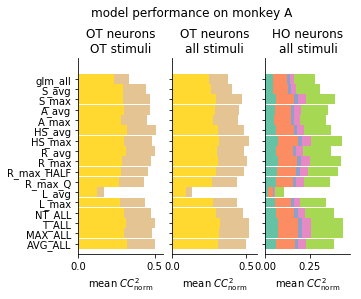

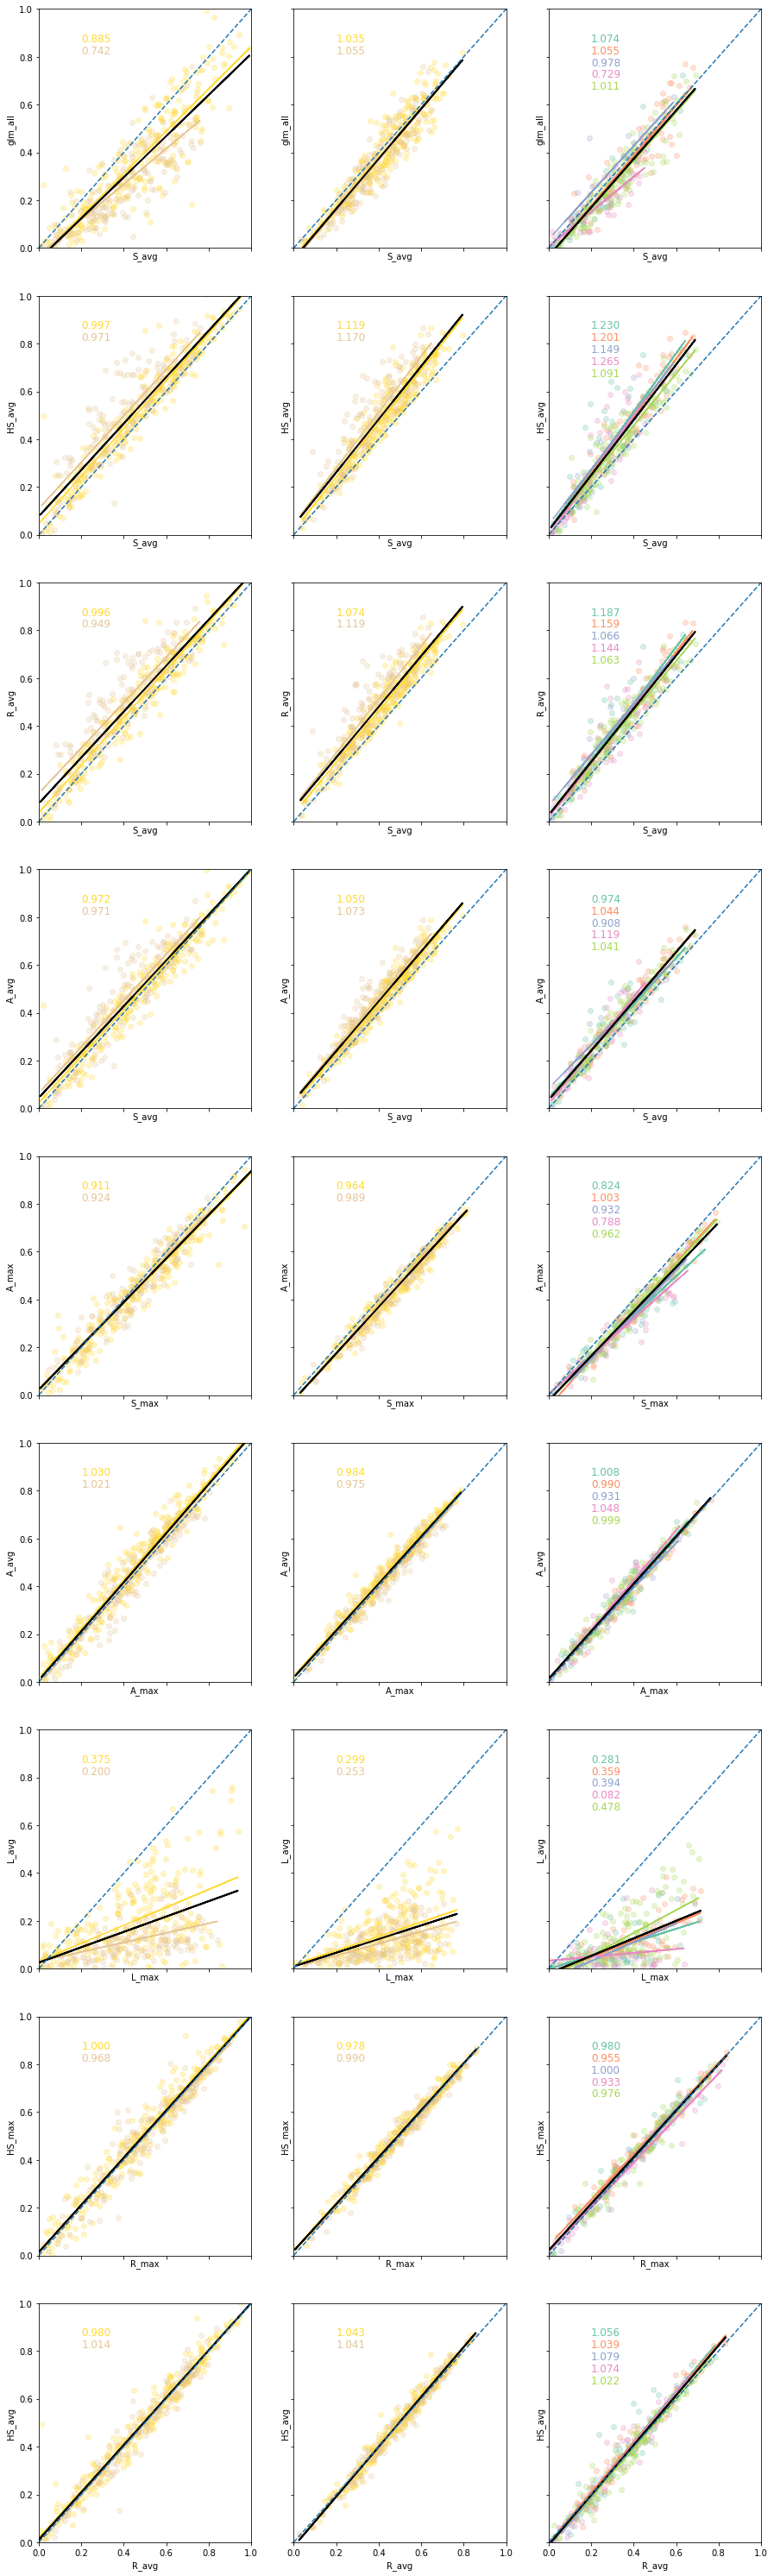

In [93]:
draw_one_stuff('MkA_Shape', 'A_a')

OT OT
all OT
all HO


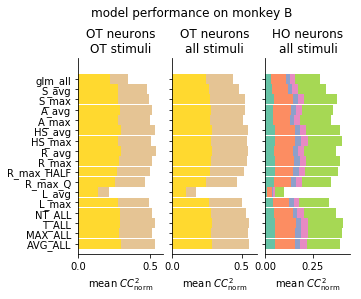

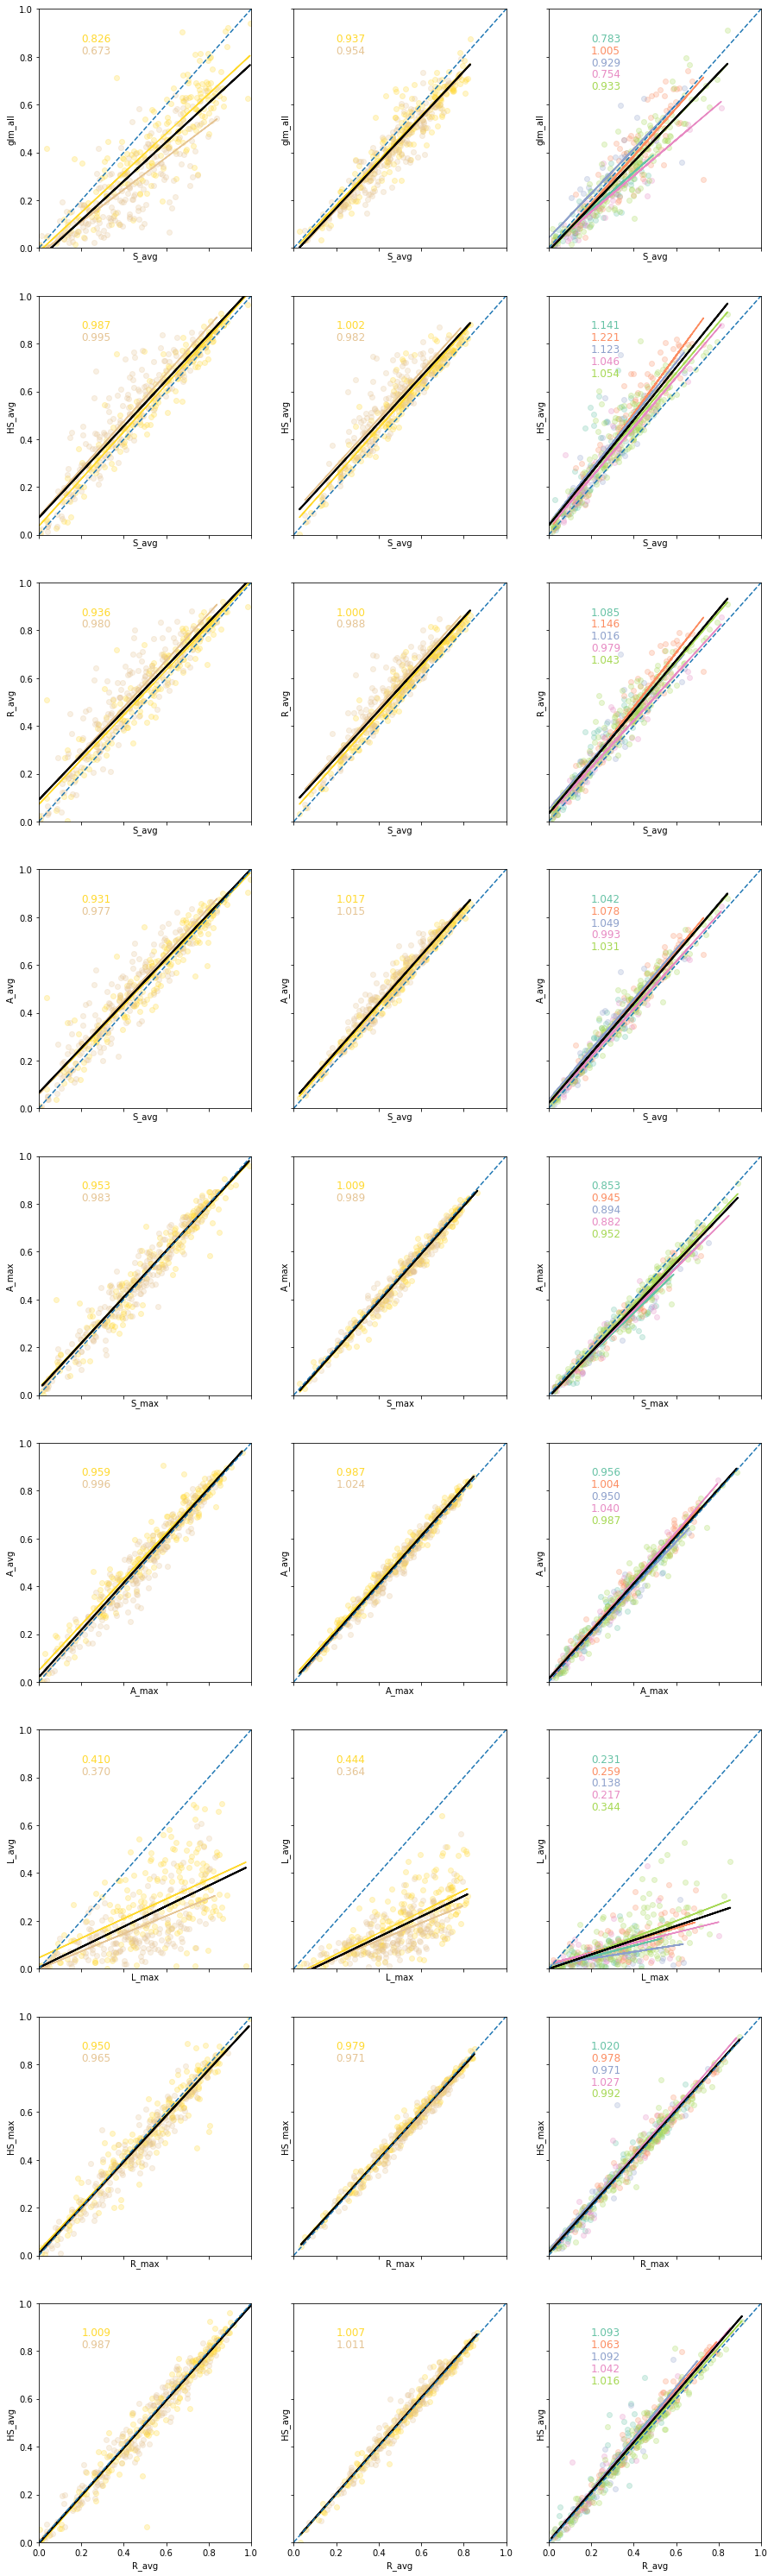

In [94]:
draw_one_stuff('MkE2_Shape', 'E2_a')